## Prepare Dependencies

In [1]:
import pandas as pd
import nltk
import spacy
import gensim
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize 

from os import listdir
from os.path import isfile, join

#Stopwords dictionary
stop = nltk.corpus.stopwords.words('english')

In [2]:
#Global Variables
nlp = spacy.load('en')

## Helper Functions

In [3]:
def string_maker(file_path):
    with open(str(file_path), 'r') as f_open:
        results = f_open.read()
    return results

def word_parser(series):
    texts = []
    
    for entry in series:
        
        #Lowercase
        raw = entry.lower()
        
        #tokenize
        tokens = w_tokenizer.tokenize(raw)
        
        #Removing stopwords and lemmatization
        
        stemmed_tokens = []
        for i in tokens:
            if i not in stop:
                stemmed_tokens.append(lemmatizer.lemmatize(i))
        
        #Add to list
        texts.append(stemmed_tokens)
        
    return texts
    
def tokenizer(text):
    
    cleaned_text = text.replace('\n', ' ')
    
    tokens = []
    for i in sent_tokenize(cleaned_text):
        
        words = []
        for j in word_tokenize(i):
            words.append(j.lower())
        
        tokens.append(words)
    
    return tokens

def corpus_stringer(text_series):
    return_string = ''
    for entry in text_series.values:
        append_string = ' ' + entry
        return_string += append_string
        
    return return_string

In [4]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

## Wrangle Data

In [5]:
file_names = []
for file in listdir('saga/english/'):
    file_names.append(str(file))

print(file_names)

['laxdaela_saga.en2.txt', 'kormaks_saga.en.txt', 'haensna-thoris_saga.en2.txt', 'havardar_saga_isfirdings.en.txt', 'haensna-thoris_saga.en.txt', 'viga-glums_saga.en.txt', 'hrafnkels_saga_freysgoda.en.txt', 'viglundar_saga.en.txt', 'faereyinga_saga.en.txt', 'grettis_saga.en2.txt', 'laxdaela_saga.en.txt', 'egils_saga.en.txt', 'bandamanna_saga.en2.txt', 'heidarviga_saga.en.txt', 'grettis_saga.en.txt', 'eyrbyggja_saga.en.txt', 'thordar_saga_hredu.en.txt', 'eiriks_saga_rauda.en.txt', 'gunnlaugs_saga_ormstungu.en.txt', 'bandamanna_saga.en.txt', 'brennu-njals_saga.en.txt', 'gisla_saga_surssonar.en.txt']


In [6]:
#Import the text from every document as an entry in a dataframe
corpus = []
raw = pd.DataFrame()

for book in file_names:
    corpus.append(string_maker('saga/english/{}'.format(str(book))))

raw['saga_name'] = file_names
raw['text'] = corpus

In [7]:
raw.head(20)

,saga_name,text
0,laxdaela_saga.en2.txt,\nThe Story of the Laxdalers\n1903 translation...
1,kormaks_saga.en.txt,\nThe Saga of Cormac the Skald\n1901 translati...
2,haensna-thoris_saga.en2.txt,\nHænsa-Thori's Saga\n2002 translation into En...
3,havardar_saga_isfirdings.en.txt,\nThe Story of Howard the Halt\n1891 translati...
4,haensna-thoris_saga.en.txt,\nThe Story of Hen-Thorir\n1891 translation in...
5,viga-glums_saga.en.txt,\nThe Saga of Viga-Glum\n1866 translation into...
6,hrafnkels_saga_freysgoda.en.txt,"\nThe Story of Hrafnkell, Frey's Priest\n1882 ..."
7,viglundar_saga.en.txt,\nThe Saga of Viglund the Fair\n1901 translati...
8,faereyinga_saga.en.txt,\nThe Saga of Thrond of Gate\n1896 translation...
9,grettis_saga.en2.txt,\nGrettir's Saga\n1914 translation into Englis...


## Clean Text

In [8]:
def book_lines(raw, num):
    
    lines = []
    
    for i, line in enumerate(raw.loc[num, 'text'].split('\n')):
        
        if len(line) > 0 and 'translation into English' not in line and not line.isspace():
            lines.append(line)
        
    return lines

def chapter_by_lines(lines):
    
    book_title = lines[0]
    chapter_titles = []
    chapter_texts = []
    
    book = pd.DataFrame()
    
    ch = -1
    
    for i, line in enumerate(lines):
        
        if i == 0:
            print(line)
            continue
        
        if 'Chapter' in line and any(char.isdigit() for char in line):
            chapter_titles.append(line)
            chapter_texts.append('')
            ch += 1
            
            continue
            print('Unreachable print statement')
        
        if len(line) > 0 and 'translation into English' not in line and not line.isspace():
            chapter_texts[ch] += line
        
    book['chapter_title'] = chapter_titles
    book['chapter_text'] = chapter_texts
    
    return book



In [9]:
lines = book_lines(raw, 11)
Egil = chapter_by_lines(lines)
Egil.head()

Egil's Saga


,chapter_title,chapter_text
0,Chapter 1 - Of Kveldulf and his sons.,"There was a man named Ulf, son of Bjalf, and H..."
1,Chapter 2 - Of Aulvir Hnuf.,Audbjorn was then king over the Firthfolk; the...
2,Chapter 3 - The beginning of the rule of Harol...,"Harold, son of Halfdan Swarthy, was heir after..."
3,Chapter 4 - Battle of king Harold and Audbjorn.,King Audbjorn went with his forces northwards ...
4,Chapter 5 - The king's message to Kveldulf.,"King Harold lay with his fleet in the Firths, ..."


In [10]:
tfidf = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english',
                             lowercase=True, #convert everything to lower case
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

## Topic Extraction

In [11]:
def tfidf_this(series, tfidf):
    x = tfidf.fit_transform(series)
    tfidf_results = pd.DataFrame(index = tfidf.vocabulary_)
    tfidf_results['score'] = tfidf.idf_
    return tfidf_results

In [12]:
series = Egil['chapter_text'].values

res = tfidf_this(series,tfidf)

In [13]:
res.sort_values('score', ascending = False).head(20)

,score
church,4.433987
gift,4.433987
bit,4.433987
wit,4.433987
hroaldsson,4.433987
thanked,4.433987
adding,4.433987
bjorn,4.433987
naming,4.433987
poetry,4.433987


In [16]:
#LDA Model
texts_egil = word_parser(Egil['chapter_text'])
dictionary_egil = corpora.Dictionary(texts_egil)
corpus_egil = [dictionary_egil.doc2bow(text) for text in texts_egil]
ldamodel_egil = gensim.models.ldamodel.LdaModel(corpus_egil, num_topics= 10, id2word = dictionary_egil, passes=20)


In [17]:
print(ldamodel_egil.print_topics(num_topics = 10, num_words=20)[0])

print(type(corpus_egil))

(0, '0.018*"egil" + 0.012*"men" + 0.011*"went" + 0.010*"came" + 0.006*"said" + 0.006*"go" + 0.005*"took" + 0.005*"son" + 0.005*"king" + 0.005*"one" + 0.004*"made" + 0.004*"much" + 0.004*"man" + 0.004*"named" + 0.004*"large" + 0.004*"would" + 0.003*"could" + 0.003*"thorolf" + 0.003*"wood" + 0.003*"ship"')
<class 'list'>


## Word2Vec

In [18]:
data = tokenizer(corpus_stringer(raw['text']))

w2v = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1)

In [19]:
w2v.similarity('egil', 'gisli')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7776163

In [20]:
print(w2v.most_similar(positive = ['egil'], topn = 10))

[('howard', 0.8499347567558289), ('thiostolf', 0.8360424637794495), ('herstein', 0.8317462801933289), ('arinbjorn', 0.8309187293052673), ('gunnlaug', 0.8272645473480225), ('sámr', 0.8269596099853516), ('thangbrand', 0.8262370228767395), ('hrut', 0.8249735832214355), ('thrond', 0.8220682740211487), ('steinar', 0.821546196937561)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [21]:
results = pd.DataFrame()
term, score = [],[]
for entry in w2v.most_similar(positive = ['egil'], topn = 10):
    term.append(entry[0])
    score.append(round(entry[1], 4))
results['Term'] = term
results['Score'] = score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
results

,Term,Score
0,howard,0.8499
1,thiostolf,0.8360
2,herstein,0.8317
3,arinbjorn,0.8309
4,gunnlaug,0.8273
5,sámr,0.8270
6,thangbrand,0.8262
7,hrut,0.8250
8,thrond,0.8221
9,steinar,0.8215


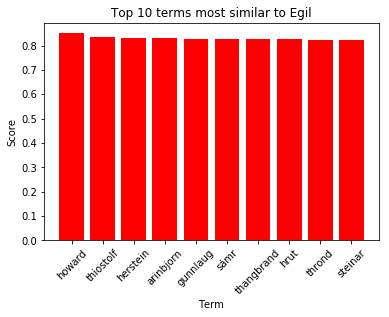

In [30]:
plt.bar(results['Term'],results['Score'], color = 'red')
plt.title('Top 10 terms most similar to Egil')
plt.xlabel('Term')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

In [32]:
print(results['Score'].max())

0.8499
